*Making viz with Seaborn*

- a dataviz package on top of matplotlib
- takes care of some semantic mapping for us

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#load libraries

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [3]:
# load data

tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: xlabel='total_bill', ylabel='tip'>

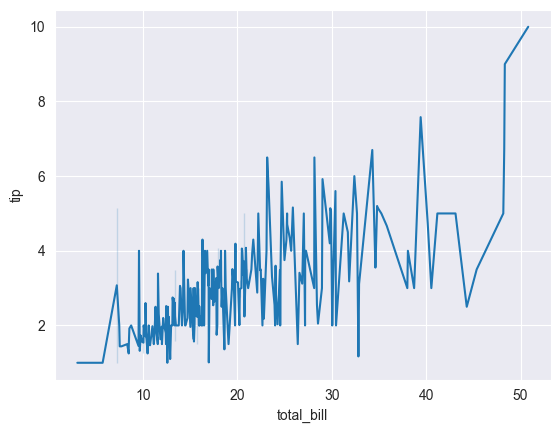

In [4]:
# Making a simple line plot of tip amount vs total bill
sns.set_style('darkgrid')
sns.lineplot(data=tips,                 # choose dataset
             x='total_bill',            # define x variable
             y='tip')                   # define y variable

[Text(0.5, 1.0, 'Tips vs Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

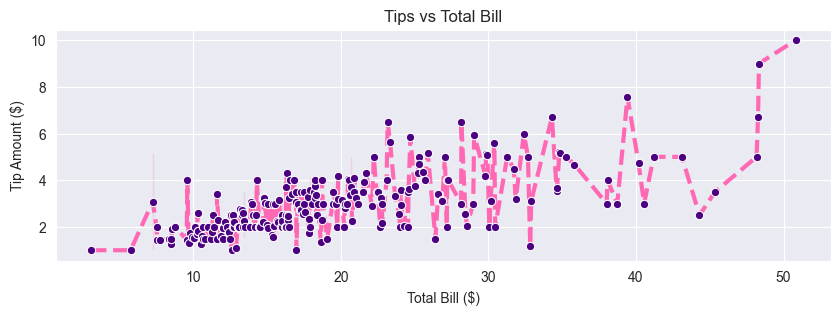

In [5]:
# add title and axis labels, and modify aesthetic elements
fig = plt.subplots(figsize = (10,3))

tipgraph = sns.lineplot(data=tips, x='total_bill', y='tip',
                        color = 'hotpink',
                        linestyle= '--',
                        linewidth=3,
                        marker='o',
                        markerfacecolor = 'indigo')

tipgraph.set(title='Tips vs Total Bill', xlabel='Total Bill ($)', ylabel = 'Tip Amount ($)')

[Text(0.5, 1.0, 'Tips vs Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

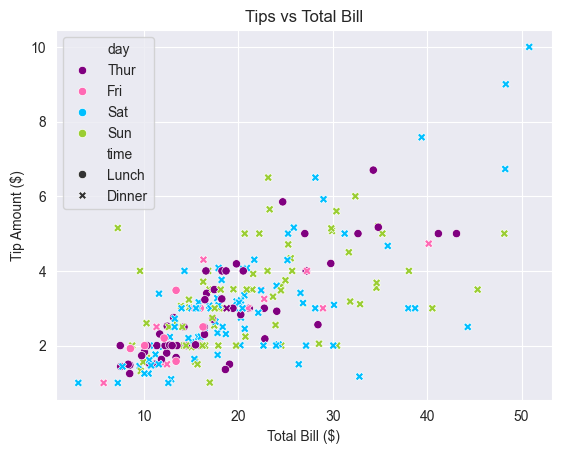

In [6]:
# Adding multiple variables, which Seaborn makes very easy to represent visually 

tipgraph = sns.scatterplot(data=tips, x='total_bill', y='tip',
                        style = 'time', hue = 'day', palette = ['purple', 'hotpink', 'deepskyblue', 'yellowgreen'])

tipgraph.set(title='Tips vs Total Bill', xlabel='Total Bill ($)', ylabel = 'Tip Amount ($)')



Making pairplot on seaborn: another convenient way to compare variables.

Good for exploratory analyses!

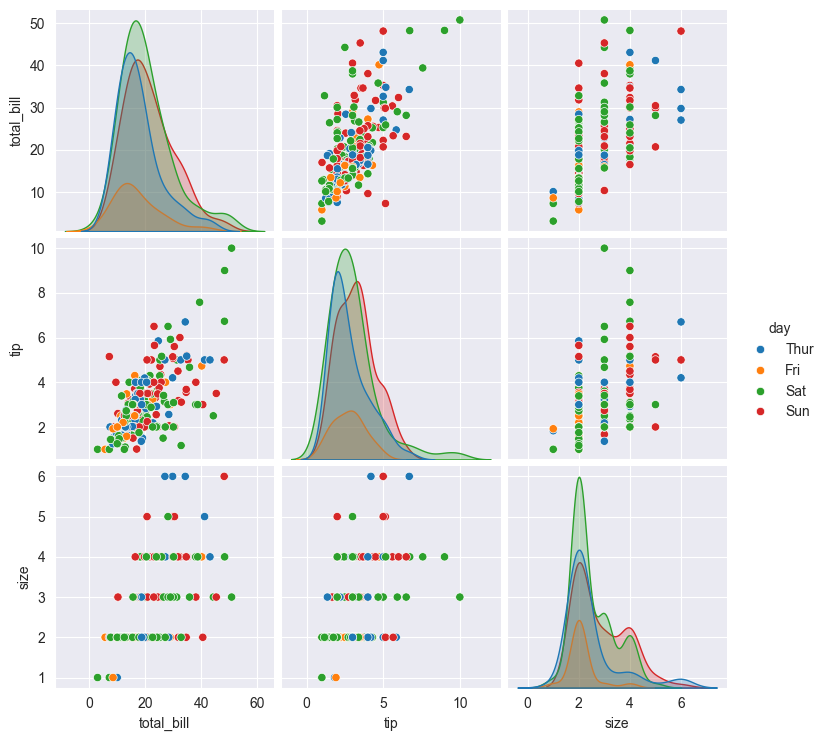

In [7]:
sns.pairplot(data=tips, hue = 'day')

Relplot = comparisons between specific levels within variables

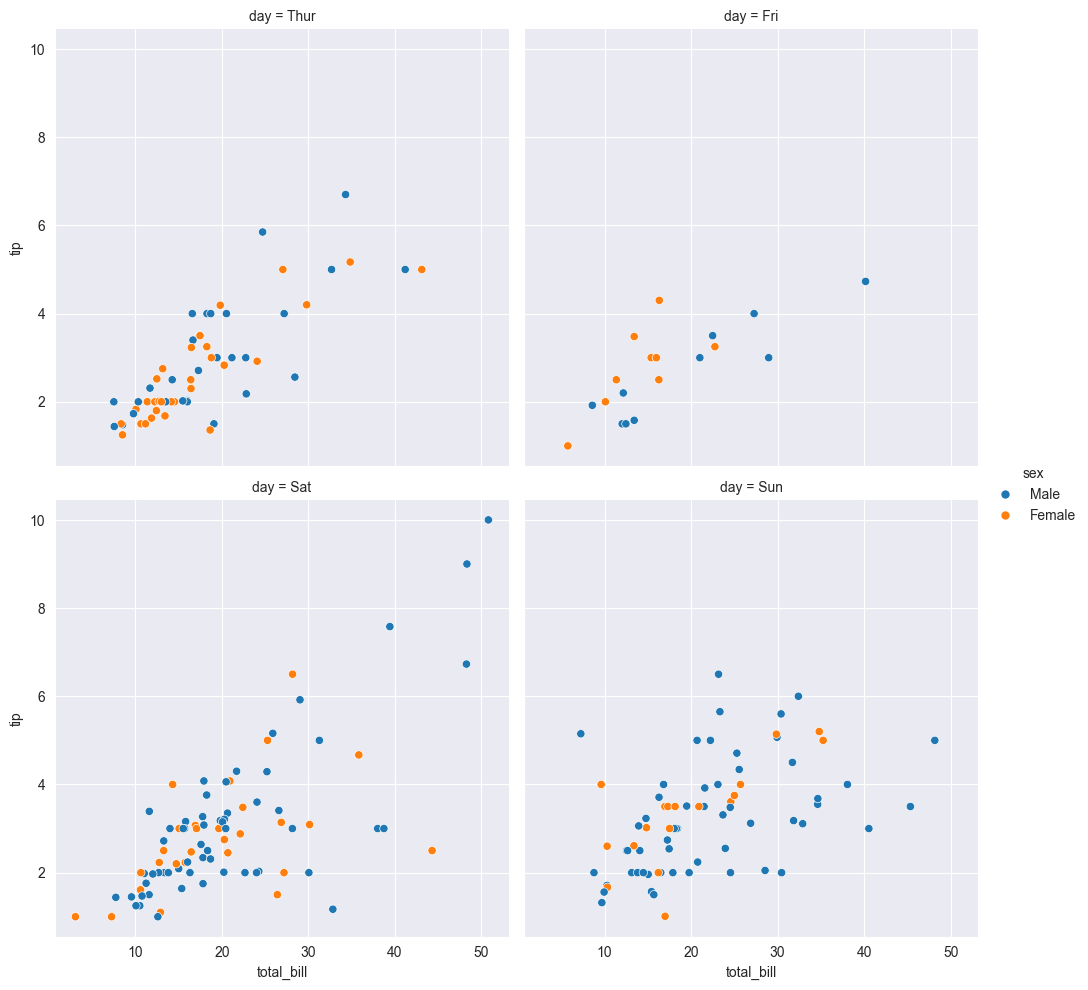

In [8]:
daysplot = sns.relplot(data=tips, 
                       x="total_bill", 
                       y="tip", 
                       hue="sex", 
                       col="day", 
                       kind="scatter", 
                       col_wrap=2)

In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install matplotlib_venn

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


PART 2 OF CODING!

In [12]:
# import packages and make sample data

import plotly.graph_objects as go
from wordcloud import WordCloud
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

In [13]:
%pip install nbformat --upgrade
import nbformat

Note: you may need to restart the kernel to use updated packages.


In [14]:
# load data

x1 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])

In [15]:
graph = go.Figure()
graph.add_trace(go.Bar(x=x1, y=y1))

graph.update_layout(
    title = 'Pirate Scores',
    xaxis_title = 'Pirates',
    yaxis_title = 'Scores'
)


In [18]:
# Customizing plotly graphs

graph = go.Figure()
graph.add_trace(go.Scatter(x=x1, y=y1, mode='markers',
                           marker=dict(
                               size=15,                                     #point size
                               color='hotpink',                             #point color
                               opacity=1,                                   #point transparency/alpha
                               line=dict(width=5, 
                                         color='purple')                     #point outline
                           )))

graph.update_layout(
    title = 'Interactive Pirate Plot',
    xaxis_title = 'Pirates',
    yaxis_title = 'Scores',
    width=500, height=500
)

Wordclouds and Venn Diagrams!

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv", on_bad_lines='skip')

df

,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937
...,...,...,...,...
727,I didn't know if you were lost. Stick with me....,Us,movie,2019
728,This guy's awesome! He's holding his own while...,Dragon Ball Super: Broly,movie,2019
729,"Murder is murder, it don’t matter who you are.",Black and Blue,movie,2019
730,You know what a lion is? A lion is a strong an...,Between Two Ferns: The Movie,movie,2019


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

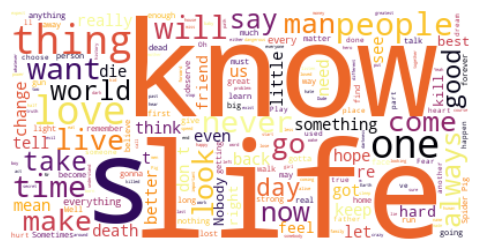

In [24]:
# join all the text from the quote column into one string. generate word cloud image with the package. importing into matploblib. 

text = " ".join(each for each in df.quote)

wordcloud = WordCloud(background_color = 'white',
                      colormap = 'inferno').generate(text)

fig, ax = plt.subplots(figsize = (7,3))
ax.imshow(wordcloud, interpolation ='bilinear')
ax.axis('off')

In [25]:
# Making venn diagrams


In [27]:
#defining our sets

A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", 'key lime'])

/Users/gregantono/opt/anaconda3/envs/dsi_participant/lib/python3.9/site-packages/matplotlib_venn/_util.py:32: UserWarning:

venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.



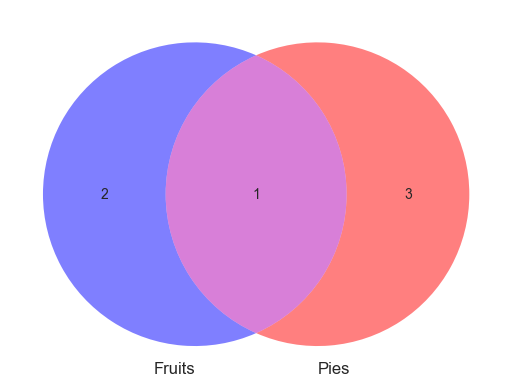

In [28]:
diagram = venn2_unweighted([A, B],
                           set_labels = ('Fruits', 'Pies'),
                           set_colors = ("blue", "red"),
                           alpha = 0.5)

plt.show() #output only shows the counts

/Users/gregantono/opt/anaconda3/envs/dsi_participant/lib/python3.9/site-packages/matplotlib_venn/_util.py:32: UserWarning:

venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.



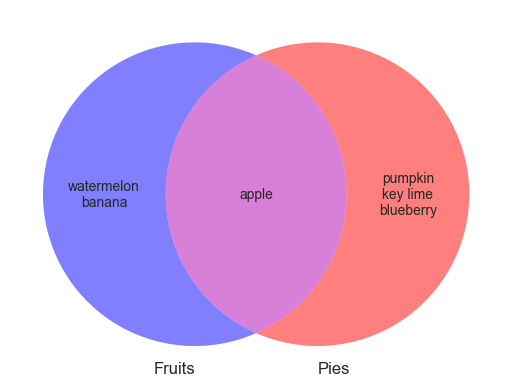

In [ ]:
diagram = venn2_unweighted([A, B],
                           set_labels = ('Fruits', 'Pies'),
                           set_colors = ("blue", "red"),
                           alpha = 0.5)

diagram.get_label_by_id("10").set_text('\n'.join(A-B))          #backslash n \n to make sure it's joined in a new line
diagram.get_label_by_id("11").set_text('\n'.join(A&B))
diagram.get_label_by_id("01").set_text('\n'.join(B-A))

plt.show()